## IMSE 586 - Big Data Analytics and Visualization

### Project : <font color='red'><b>"World Suicide Rate Analysis and Prediction"</b></font> by Nikhila Kavuru

### <font color='green'> Data Description </font>

The dataset is a combination of four datasets (retrieved from <b>WHO, United Nations Development Program, World Bank, Kaggle dataset</b>) compiled together by time and place. There are 5 categorical and 7 numerical features.

**country** : Country name

**year** : Year value

**sex** : Male or Female 

**age** : Age group of those who committed suicide

**suicides_no** : Number of suicides

**population** : Population of the country

**suicides/100k pop** : Suicide numbers per 100k population 

**country-year** : Field consisting concatenated Country-Year value

**HDI for year** : Human Developement Index for year

**gdp_per_year** : Gross Domestic Product per year (shows a country's economic health)

**gdp_per_capita** : Gross Domestic Product per capita (shows a country's standard of living)

**generation** : Generation relating to age group (Boomers, Millenials, Generation X, etc.,)

In [1]:
# Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading master file into pandas dataframe

masterdata = pd.read_csv('./data/master.csv')

masterdata.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
masterdata.shape

(27820, 12)

There are 27820 data points and 12 columns in the dataset.

In [4]:
# Renaming the columns

masterdata.columns = ["country", "year", "sex", "AgeGroup", "NumberOfSuicides", "Population",
               "SuicidesPer100k", "CountryYear", "HDI", "GDP_year", "GDP_capita", "Generation"]

masterdata.head(2)

,country,year,sex,AgeGroup,NumberOfSuicides,Population,SuicidesPer100k,CountryYear,HDI,GDP_year,GDP_capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [5]:
# Statistical analysis of numerical data

masterdata.describe()

,year,NumberOfSuicides,Population,SuicidesPer100k,HDI,GDP_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
# Data type of each column

masterdata.dtypes

country              object
year                  int64
sex                  object
AgeGroup             object
NumberOfSuicides      int64
Population            int64
SuicidesPer100k     float64
CountryYear          object
HDI                 float64
GDP_year             object
GDP_capita            int64
Generation           object
dtype: object

### <font color='green'>Data Cleaning</font>

In [7]:
masterdata.isnull().sum()

country                 0
year                    0
sex                     0
AgeGroup                0
NumberOfSuicides        0
Population              0
SuicidesPer100k         0
CountryYear             0
HDI                 19456
GDP_year                0
GDP_capita              0
Generation              0
dtype: int64

### Deleting 'HDI' and 'CountryYear' columns

#### As there are many missing values (more than 2/3rd of data) for the column 'HDI', we cannot proceed with proper analysis without deleting it.

In [8]:
# Deleting columns 'HDI' [Not enough observations] and column 'CountryYear' [Redundant]

masterdata = masterdata.drop(['HDI', 'CountryYear'], axis = 1)

masterdata.head(2)

,country,year,sex,AgeGroup,NumberOfSuicides,Population,SuicidesPer100k,GDP_year,GDP_capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent


### Year

In [9]:
masterdata['year'].value_counts()

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [10]:
len(masterdata[masterdata['year'] == 2016].country.value_counts())

16

- Year '2016' contains less number of rows compared to other years
- Only had  data for 16 countries while others had > 48 countries

In [11]:
# Dropping rows with the year '2016'

masterdata.drop(masterdata[masterdata['year'] == 2016].index, inplace = True)

In [12]:
masterdata['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011], dtype=int64)

### Country

In [13]:
print('Total Number of countries in dataset is :', masterdata['country'].nunique())

Total Number of countries in dataset is : 100


Utilizing seaborn's 'countplot' to find the number of data points in each country.

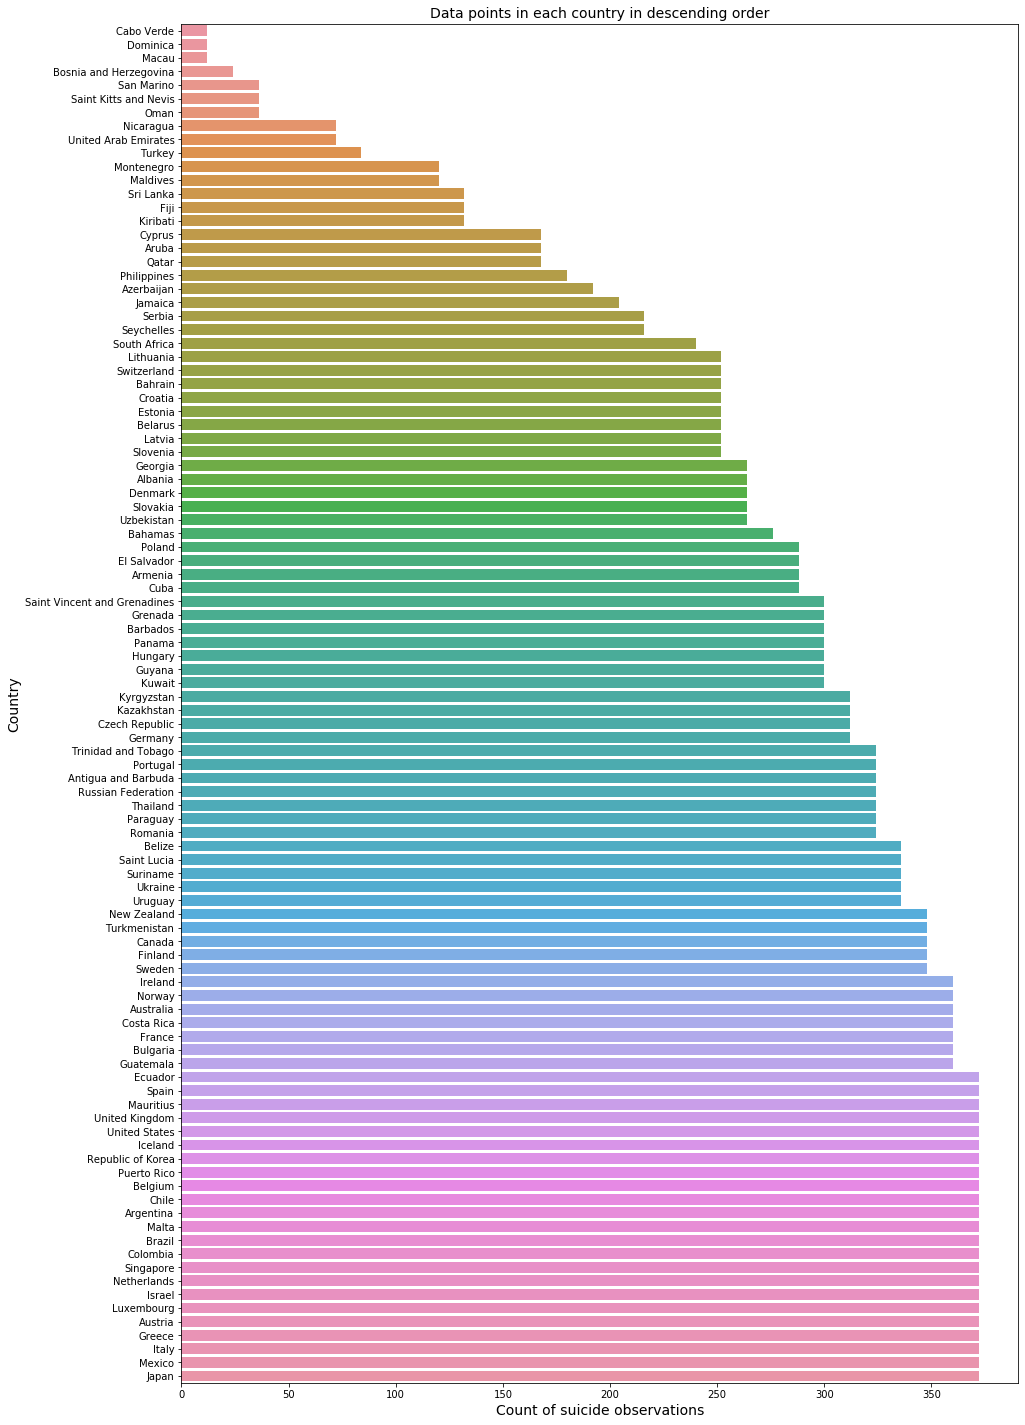

In [14]:
plt.figure(figsize = (15,25))

sns.countplot(y = 'country', data = masterdata,
            order = masterdata['country'].value_counts(ascending = True).index)

plt.xlabel('Count of suicide observations', fontsize = 14)

plt.ylabel('Country',fontsize = 14)

plt.title('Data points in each country in descending order', fontsize = 14)

plt.show()

#### Countries to be removed due to large volume of missing data  (<= 3 years data)

1. Macau                     only has data for the year '1994'
2. Dominica                  only has data for the year '1985'
3. Cabo Verde                only has data for the year '2011'
4. Bosnia and Herzegovina    only has data for the year '2011' and '2014'
5. Oman                      only has data for the year '2009', '2010' and '2014'
6. San Marino                only has data for the year '1999', '2000' and '2005'
7. Saint Kitts and Nevis     only has data for the year '1990', '1991' and '1992'

In [15]:
# Dropping rows with the above mentioned 7 countries

masterdata.drop(masterdata[masterdata['country'].isin(['Macau', 
                                                       'Dominica', 'Cabo Verde', 'Bosnia and Herzegovina',
                                                       'Oman','San Marino', 'Saint Kitts and Nevis' ])].index,
                inplace = True)

In [16]:
print('The remaining countries are:',masterdata['country'].nunique())

The remaining countries are: 93


### Key Takeaways from Data Cleaning

- Many countries in Asia and Africa are not included in the dataset (such as India, China, etc)

- 7 countries removed due to absence of data for many years

- Columns 'HDI' and 'Country-Year' are dropped

- All rows of year '2016' are dropped

### <font color='green'>Exploratory Data Analysis</font>

### 1. Year

#### 1.1 Research Question : How has the mean global suicide rate varied over the years ?

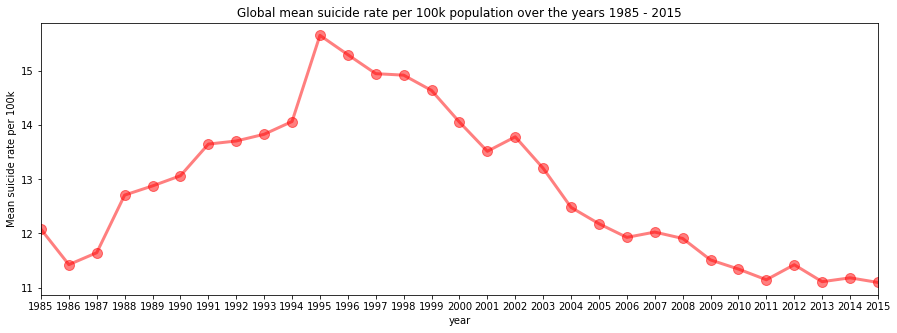

In [17]:
plt.figure(figsize = (15,5))

Grouped_data = masterdata['SuicidesPer100k'].groupby(masterdata['year']).mean()

Grouped_data.plot(marker = 'o', markersize = 10, alpha = 0.5, color = 'red', linewidth = 3)

plt.xticks(np.arange(1985, 2016))

plt.ylabel('Mean suicide rate per 100k')

plt.title('Global mean suicide rate per 100k population over the years 1985 - 2015')

plt.show()

#### 1.2 Research Question : How does the trend look in the most popular countries ?

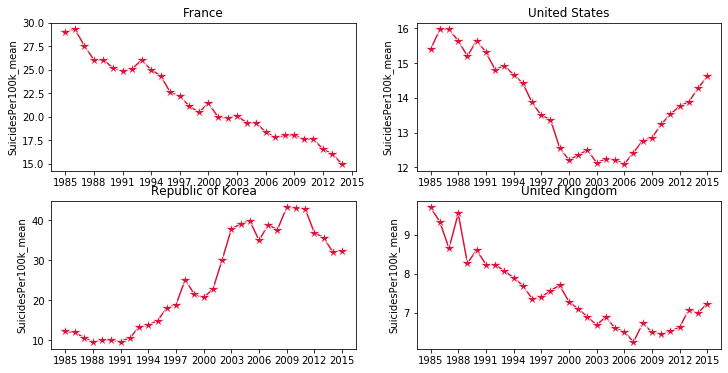

In [18]:
plt.figure(figsize=(12,6))

popular_contries = ['France', 'United States', 'Republic of Korea', 'United Kingdom']

for i, country in enumerate(popular_contries):
    plt.subplot(2,2, i+1)
    Group = masterdata.groupby(by=['country', 'year']).agg({"SuicidesPer100k": ['mean']})
    Group.columns = ["SuicidesPer100k_mean"]
    Group.reset_index(inplace=True)
    Group_Countries = Group[Group['country'] == country]
    plot = sns.lineplot(x="year", y="SuicidesPer100k_mean", data=Group_Countries, marker = '*',markersize = 12, color = 'crimson')
    plt.title(f"{country}", fontsize = 12)
    plt.xticks(np.arange(1985, 2016,3))
    plot.set(xlabel = None)

### Key Takeaways from Year 

- There is a clear peak in 1995 and then a decrease after it
- On a deeper level, suicide rate varies among countries on a vast level (can view increasing and decreasing trends)

### 2. Gender

#### - 2.1 Research Question : Which gender is the most affected ?
#### - 2.2 Research Question : Pattern of male and female suicide rate over the years ?

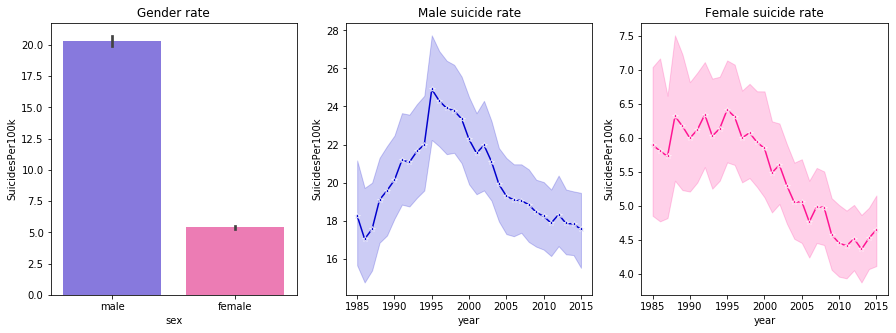

In [19]:
palette ={"male": "mediumslateblue", "female": "hotpink"}

fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x = 'sex', y = 'SuicidesPer100k', data = masterdata, ax = ax[0], palette = palette )

male_only = masterdata[masterdata['sex'] == 'male']

sns.lineplot(x = 'year', y = 'SuicidesPer100k', 
             color = 'mediumblue', marker = '*', data = male_only, ax = ax[1])

female_only = masterdata[masterdata['sex'] == 'female']

sns.lineplot(x = 'year', y = 'SuicidesPer100k', 
             color = 'deeppink', marker = '*', data = female_only, ax = ax[2])

ax[0].set_title('Gender rate')
ax[1].set_title('Male suicide rate')
ax[2].set_title('Female suicide rate')
plt.show()

### Key Takeaways from Gender 
- Globally, the rate of suicide for men has been ~4x higher for men
- Both male & female suicide rates peaked in 1995, declining since
- There is a clear pattern of downward trend in suicide rates of female


### 3. Age Group
#### Research Question 3.1 : Does suicide rate increase along with age ?
#### Research Question 3.2 : Which age group is the most affected ?

In [20]:
print('Age groups present in dataset are :',masterdata['AgeGroup'].unique())

print('Generations present in dataset are :',masterdata['Generation'].unique())

Age groups present in dataset are : ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
Generations present in dataset are : ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


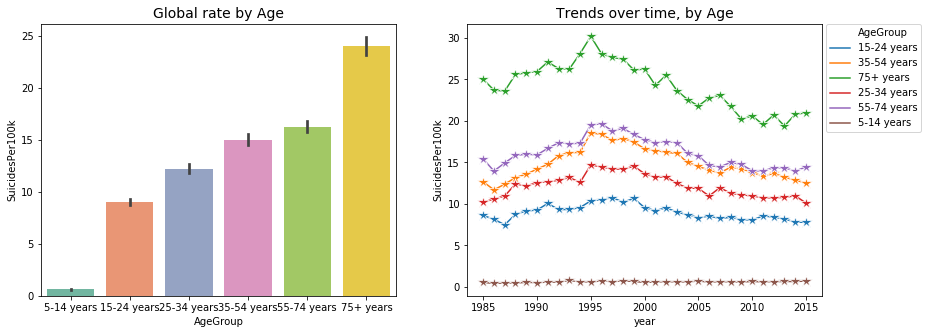

In [21]:
fig, ax = plt.subplots(1,2, figsize = (14,5))

sns.barplot(data=masterdata, x ='AgeGroup', y='SuicidesPer100k', palette = 'Set2',
            order = ['5-14 years','15-24 years','25-34 years',
                     '35-54 years','55-74 years','75+ years'], ax=ax[0])

sns.lineplot(x = 'year', y = 'SuicidesPer100k', hue = 'AgeGroup', 
             ci = None, marker = '*',markersize = 12, data = masterdata, ax = ax[1])

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax[0].set_title('Global rate by Age', fontsize = 14)
ax[1].set_title('Trends over time, by Age', fontsize = 14)
plt.show()

### Key Takeaways from Age Group

- The probability of suicide is increasing with age

- Downward trend noticeable over the years for all age groups except 5- 14 since 1995

- Rate of suicide for age category '5-14' stays approximately uniform and low

### 4. Generation
<img src="Capture.png">
Source: https://www.careerplanner.com/Career-Articles/Generations.cfm

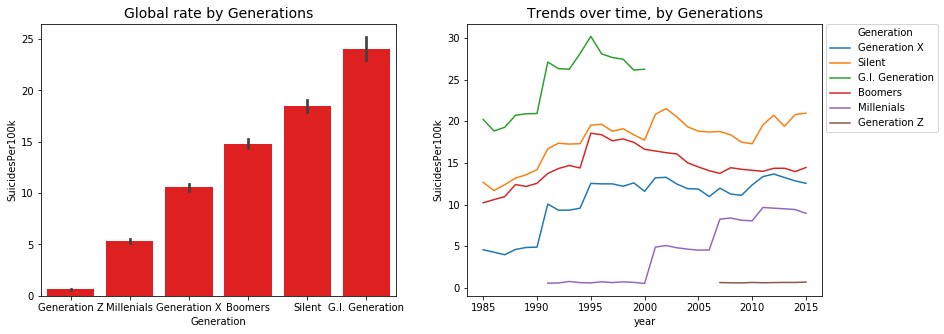

In [22]:
fig, ax = plt.subplots(1,2, figsize = (14,5))

sns.barplot(data=masterdata, x ='Generation', y='SuicidesPer100k', color = 'red',
            order = ['Generation Z', 'Millenials','Generation X','Boomers', 'Silent','G.I. Generation'], ax = ax[0])

sns.lineplot(x = 'year', y = 'SuicidesPer100k', hue = 'Generation', 
             ci = None,  data = masterdata, ax = ax[1])

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax[0].set_title('Global rate by Generations', fontsize = 14)
ax[1].set_title('Trends over time, by Generations', fontsize = 14)
plt.show()

### Key Takeaways from Generations
- There are sharp increases due to population varying with generations
- Overall increasing yearly trend noticeable which can be related to increase with age

### 5. Country

#### - 5.1 Research Question : Which countries have the highest average suicide / 100k population ?
#### - 5.2 Research Question : Which countries have the lowest average suicide / 100k population ?

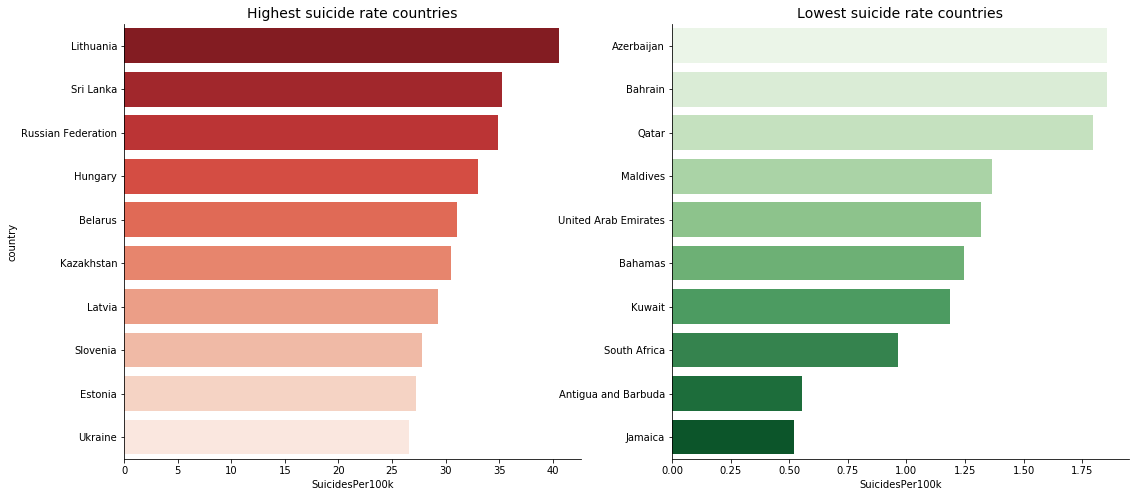

In [23]:
fig, ax = plt.subplots(1,2, figsize = (18,8))

highest_df = masterdata['SuicidesPer100k'].groupby(masterdata['country']).mean().sort_values(ascending = False)

f1 = sns.barplot(highest_df.head(10), highest_df.head(10).index,
            ax = ax[0], palette = 'Reds_r')

lowest_df = masterdata['SuicidesPer100k'].groupby(masterdata['country']).mean().sort_values(ascending = False)

f2 = sns.barplot(lowest_df.tail(10), lowest_df.tail(10).index, 
            ax = ax[1], palette = 'Greens')

f2.set(ylabel = None)
ax[0].set_title('Highest suicide rate countries', fontsize = 14)
ax[1].set_title('Lowest suicide rate countries', fontsize = 14)
sns.despine()
plt.show()

### Key Takeaways from Country
- Lithuania’s suicidal rate is largest by huge surplus : greater than 40 suicides/100k
- Many European countries with higher rate
- The countries with lowest suicide rates have both well developed and least developed countries
- Important Note : Many countries in Africa and Asia are missing

### 6. 'GDP per capita' and 'GDP per year'


In [24]:
# GDP per year in millions

masterdata['GDP_year_millions'] = (masterdata['GDP_year'].str.replace(",", "").astype("int64") / 1000000).round(3)

masterdata['GDP_year_millions'].head()

0    2156.625
1    2156.625
2    2156.625
3    2156.625
4    2156.625
Name: GDP_year_millions, dtype: float64

#### - 6.1 Research Question: Do the countries with higher standard of living (GDP_capita) have lesser suicide rates ?
#### - 6.2 Research Question: Do the countries with lower standard of living  (GDP_capita) have higher suicide rates ?

In [25]:
# Plotting table with countries of highest GDP

highestGDP = masterdata['GDP_capita'].groupby(masterdata['country']).mean().sort_values(ascending = False)

highestGDP.head(10).to_frame().style.background_gradient(cmap='Greens', subset=['GDP_capita'])

,GDP_capita
country,
Luxembourg,68798.4
Qatar,68070.3
Switzerland,62981.8
Norway,57319.6
Denmark,49299.9
United Arab Emirates,42162
Sweden,40948.5
United States,39269.6
Iceland,38591.1


In [26]:
# Plotting table with countries of lowest GDP

lowestGDP = highestGDP.tail(10).to_frame().style.background_gradient(cmap='Reds_r', subset=['GDP_capita'])

lowestGDP

,GDP_capita
country,
Ukraine,1867.54
Albania,1859.05
Armenia,1807.46
Guyana,1674.92
Philippines,1540.2
Azerbaijan,1005.12
Uzbekistan,976.182
Sri Lanka,904.273
Kiribati,875.909


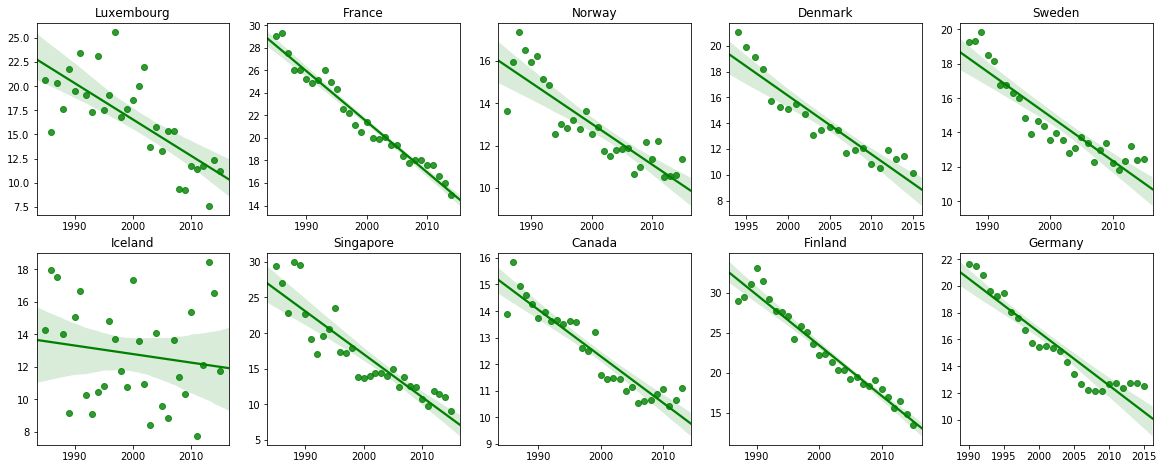

In [27]:
# Regplot of some of the highest GDP countries

plt.figure(figsize = (20,12))
h_cn = ['Luxembourg', 'France', 'Norway', 'Denmark', 'Sweden',
        'Iceland','Singapore', 'Canada','Finland', 'Germany']

for i, country in enumerate(h_cn):
    plt.subplot(3,5, i+1)
    Group1 = masterdata.groupby(by=['country', 'year']).agg({"SuicidesPer100k": ['mean']})
    Group1.columns = ["SuicidesPer100k_mean"]
    Group1.reset_index(inplace=True)
    Group_cn = Group1[Group1['country'] == country]
    r2 = sns.regplot(x="year", y="SuicidesPer100k_mean", data=Group_cn, color = 'green')
    r2.set(xlabel = None)
    r2.set(ylabel = None)
    plt.title(f"{country}", fontsize = 12)

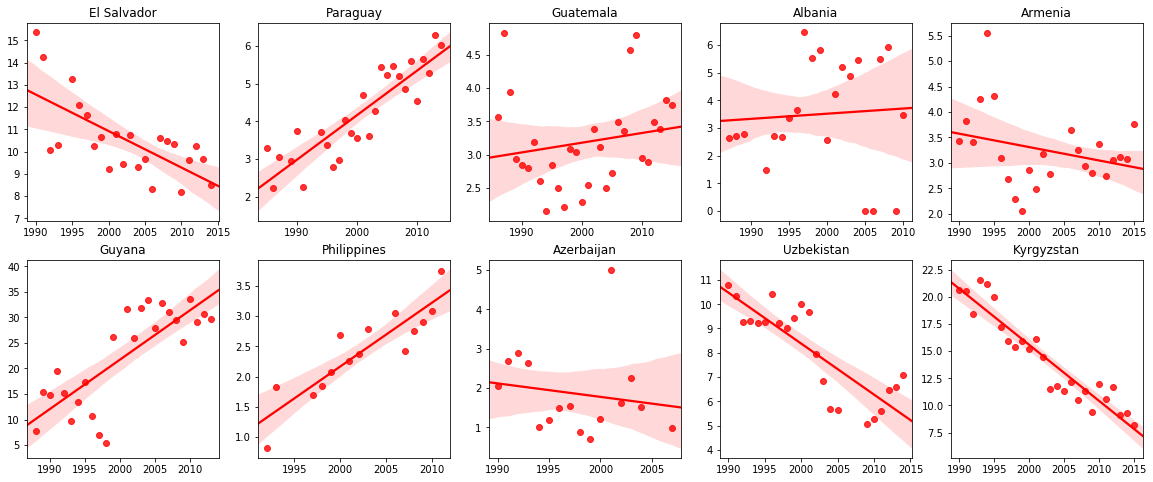

In [28]:
# regplot of some of the lowest GDP countries

plt.figure(figsize = (20,8))

h_cn = ['El Salvador', 'Paraguay', 'Guatemala','Albania', 'Armenia',
        'Guyana', 'Philippines', 'Azerbaijan','Uzbekistan', 'Kyrgyzstan']

for i, country in enumerate(h_cn):
    plt.subplot(2,5, i+1)
    Group1 = masterdata.groupby(by=['country', 'year']).agg({"SuicidesPer100k": ['mean']})
    Group1.columns = ["SuicidesPer100k_mean"]
    Group1.reset_index(inplace=True)
    Group_cn = Group1[Group1['country'] == country]
    r2 = sns.regplot(x="year", y="SuicidesPer100k_mean", data=Group_cn, color = 'red')
    r2.set(xlabel = None)
    r2.set(ylabel = None)
    plt.title(f"{country}", fontsize = 12)

### Key Takeaways from GDP per capita
- It is clear that GDP is not a universal factor on suicide rate
- Most high GDP countries have a decreasing trend (especially European coutries) compared to low GDP countries

### Correlation

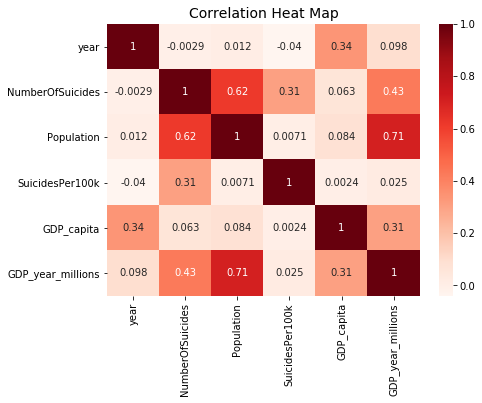

In [29]:
plt.figure(figsize = (7,5))

ax = sns.heatmap(masterdata.corr(), annot = True, cmap = 'Reds')

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title("Correlation Heat Map", fontsize = 14)
plt.show()

### <font color='green'>Data Preprocessing</font>
#### Population, GDP_capita -> Standard Scaling
#### Country, Sex, AgeGroup, Generation -> One Hot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

enc = OneHotEncoder(sparse=False)

ohe = make_pipeline(OneHotEncoder(sparse=False))

scale = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((ohe, ['country', 'sex', 'AgeGroup']),
                       (scale, ['Population', 'GDP_capita']),
                        remainder = 'passthrough'
                       )

### <font color='green'> Model Building </font>
### Model 1 : Linear Regression

In [31]:
X_data = masterdata[['year', 'GDP_capita', 'Population',
                     'country', 'sex', 'AgeGroup']] # feature matrix consisting predictors

y_data = masterdata['SuicidesPer100k'] # Target variable

In [32]:
from sklearn import linear_model

lr = linear_model.LinearRegression() # instantiating LM model

pipe = make_pipeline(preprocessor, lr )

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=.2, random_state = 0
                                                   )

In [34]:
# Training the model

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
              

In [35]:
# Making predictions with test data

y_predictions = pipe.predict(X_test)

In [36]:
from sklearn import metrics

print('R2 score for Linear model is: ',round(metrics.r2_score(y_test, y_predictions),2))

R2_LinearModel = round(metrics.r2_score(y_test, y_predictions),4)

R2 score for Linear model is:  0.52


In [37]:
print('RMSE for Linear model is: ',np.sqrt(metrics.mean_squared_error(y_test, y_predictions)).round(3))

RMSE_LinearModel = np.sqrt(metrics.mean_squared_error(y_test, y_predictions)).round(4)

RMSE for Linear model is:  12.79


### Model 2 : Random Forest Regressor

In [38]:
# pipeline for Random Forest Regressor

preprocessor2 = make_column_transformer((ohe, ['country', 'sex', 'AgeGroup']),
                       remainder = 'passthrough'
                       )

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 0) # RF instantiation

pipe2 = make_pipeline(preprocessor2, rf)

In [40]:
# Random Forest Regressor model training

pipe2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                

In [41]:
# Making predictiosn with test data

y_pred_Forest = pipe2.predict(X_test)

In [42]:
print('R2 score for Random Forest Regressor is: ',metrics.r2_score(y_test, y_pred_Forest).round(4))

R2_RandomForestRegressor = metrics.r2_score(y_test, y_pred_Forest).round(4)

R2 score for Random Forest Regressor is:  0.9047


In [43]:
print('RMSE for RF Regressor is: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred_Forest)).round(4))

RMSE_RandomForestRegressor = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Forest)).round(4)

RMSE for RF Regressor is:  5.7262


### Grid Search with Cross Validation

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# Displaying all parameters

pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('pipeline',
                                    Pipeline(memory=None,
                                             steps=[('onehotencoder',
                                                     OneHotEncoder(categorical_features=None,
                                                                   categories=None,
                                                                   drop=None,
                                                                   dtype=<class 'numpy.float64'>,
                                                                   handle_unknown='error',
                                                                   n_values=None,
                                                                   sparse=False))],
                                   

In [46]:
# Setting up parameters for Random Forest Regressor

param_grid = {'randomforestregressor__n_estimators': [10,50,70,100],
             'randomforestregressor__min_samples_split': [2,3,4],
             'randomforestregressor__min_samples_leaf': [1,2],
             'randomforestregressor__max_features': ['auto','sqrt']
             }

In [47]:
# Performing a GridSearchCv to get best parameters

gridsearch = GridSearchCV(pipe2, param_grid = param_grid,
                          cv = 5, scoring = 'r2', n_jobs = -1)

In [48]:
# Training the model

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehotencoder',
                                                                                          OneHotEncoder(categorical_features=None,
                                                                                                        ca

In [49]:
# best parameters 

gridsearch.best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 4,
 'randomforestregressor__n_estimators': 100}

#### With a 5-fold cross-validation for each of the above model configurations, a total of 240 model fittings to the data is performed.

### Model 3 :Setting up model with best parameters

In [50]:
rf2 = RandomForestRegressor(n_estimators = 100,max_features = 'auto', 
                            min_samples_leaf = 1, min_samples_split = 4,
                            random_state = 0)

pipe3 = make_pipeline(preprocessor2, rf2)

In [51]:
pipe3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencoder',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                

In [52]:
y_pred_Forest2 = pipe3.predict(X_test)

In [53]:
print('R2 score for Random Forest Regressor using GridSearch CV is: '
      ,metrics.r2_score(y_test, y_pred_Forest2).round(4))

R2_RF_GridSearchCV = metrics.r2_score(y_test, y_pred_Forest2).round(4)

R2 score for Random Forest Regressor using GridSearch CV is:  0.9071


In [54]:
print('RMSE for RF Regressor using GridSearchCV is: '
      ,np.sqrt(metrics.mean_squared_error(y_test, y_pred_Forest2)).round(4))

RMSE_RF_GridSearchCV = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Forest2)).round(4)

RMSE for RF Regressor using GridSearchCV is:  5.6514


### <font color='green'> Model Comparison </font>

In [55]:
R2_Score = [R2_LinearModel, R2_RandomForestRegressor, R2_RF_GridSearchCV]
RMSE=[RMSE_LinearModel, RMSE_RandomForestRegressor, RMSE_RF_GridSearchCV]

column={'R2 Score': R2_Score,'RMSE': RMSE}
models=['Multiple Linear Regression', 'Random Forest Regressor', 'Random Forest Regressor with GridSearchCV']
df=pd.DataFrame(data=column, index=models)
df

,R2 Score,RMSE
Multiple Linear Regression,0.5243,12.7905
Random Forest Regressor,0.9047,5.7262
Random Forest Regressor with GridSearchCV,0.9071,5.6514


### <font color='green'>Conclusion and Future Works </font>

- <b> Random Forest Regressor predicts better compared to Multiple Linear Regression as it handles non-linearity in data better
- Data such as social cultural factors for each country, alcohol consumption, Depression history can help increase prediction of suicide rate
- Males have high suicidal rate in all the years
- GDP vs suicide rate varies highly across each country and does not paint a clear picture
- Future works can include combining other useful datasets